The purpose of this notebook is to create a geodataframe with the month ping data and the zip codes.

Import packages

In [3]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Inspect shp file

In [30]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/promise_zone.json')
print(promise_zone.crs)
promise_zone.head( )

epsg:4326


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


Plot the Promise Zone

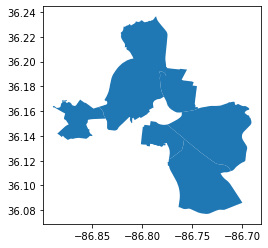

In [32]:
promise_zone.plot();

Read in the pkl file

In [6]:
may = pd.read_pickle('../data/may.pkl')

In [33]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.79988 36.13682)
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,POINT (-86.77295 36.19125)
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,POINT (-86.80629 36.14475)
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,POINT (-86.77469 36.16206)
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,POINT (-86.78311 36.15097)


Create geometry column for may.

In [ ]:
may['geometry'] = may.apply(lambda x: Point((x.longitude, 
                                            x.latitude)), 
                                        axis=1)
may.head(3)

Match the crs

In [ ]:
promise_zone.crs

In [ ]:
may_geo = gpd.GeoDataFrame(may, 
                           crs = promise_zone.crs, 
                           geometry = may['geometry'])
type(may_geo)
may_geo.head()

In [ ]:
may_geo.crs

Join the geodataframes with a spatial join. Only keep the zone_id and geometry from promise_zone.

In [17]:
promise_zone = promise_zone[['ZONE_ID', 'geometry']]
promise_zone.head()

,ZONE_ID,geometry
0,1,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [23]:
may_by_zone = gpd.sjoin(may_geo, promise_zone, op = 'within')

Exception ignored on calling ctypes callback function: <function Index._create_idx_from_stream.<locals>.py_next_item at 0x000001B30E32E940>
Traceback (most recent call last):
  File "C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\rtree\index.py", line 1035, in py_next_item
    p_id[0], coordinates, obj = next(stream_iter)
  File "C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py", line 86, in <genexpr>
    (i, item.bounds, idx)
  File "C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\shapely\geometry\point.py", line 123, in bounds
    xy = self.coords[0]
  File "C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\shapely\coords.py", line 74, in __getitem__
    m = self.__len__()
  File "C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\shapely\coords.py", line 49, in __len__
    self._update()
  File "C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\shapely\coords.py", line 46, in _update
    self._cseq = lgeo

In [21]:
may_by_zone.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,ZONE_ID
